# Lab Assignment 1
<a href='https://courses.edx.org/courses/course-v1:Microsoft+DAT210x+4T2016/courseware/1aabc1638cb64c699ddc447d16e3cfea/fcc6fcce0493405bb3b52de2f4486384/?child=first'>link</a>


In this assignment, you're going to experiment with a real life armadillo sculpture scanned using a Cyberware 3030 MS 3D scanner at Stanford University. The sculpture is available as part of their 3D Scanning Repository, and is a very dense 3D mesh consisting of 172974 vertices! The mesh is available for you, located at /Module4/Datasets/stanford_armadillo.ply. It is not a Python file, so don't attempt to load it with a text editor!

<img src="https://courses.edx.org/asset-v1:Microsoft+DAT210x+4T2016+type@asset+block@armadillo.png" alt="Drawing" style="width: 200px;"/>

Open up the Module4/assignment1.py starter code and read through it carefully. You will notice the use of a new library, Plyfile. This library loads up the 3D binary mesh for you. The mesh is further converted into a Pandas dataframe for your ease of manipulation. Complete the following tasks:

1. Before changing any of the code, go ahead and execute assignment1.py. You should see the 3D armadillo. Your goal is to reduce its dimensionality from three to two using PCA to cast a shadow of the data onto its two most important principal components. Then render the resulting 2D scatter plot.
2. Fill out the proper code in the do_PCA() and do_RandomizedPCA() methods. Be sure to return the result of your transformation! You may even want to read the SciKit-Learn documentation on .transform(), just for future reference so you know what data type comes out of it.
3. Re-run the application! Then, answer the questions below:

In [1]:
# imports and configuration

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import datetime

from mpl_toolkits.mplot3d import Axes3D
from plyfile import PlyData, PlyElement

from sklearn.decomposition import PCA, RandomizedPCA

# Every 100 data samples, we save 1. If things run too
# slow, try increasing this number. If things run too fast,
# try decreasing it... =)
reduce_factor = 25

matplotlib.style.use('ggplot')

#%matplotlib notebook

In [2]:
# load the data

ply_ff = r'C:\Users\ng35019\Documents\Training\python_for_ds\Module4\PCA\Datasets\stanford_armadillo.ply'

ply_raw = PlyData.read(ply_ff); ply_raw
# armadillo = pd.DataFrame({
#   'x':plyfile['vertex']['z'][::reduce_factor],
#   'y':plyfile['vertex']['x'][::reduce_factor],
#   'z':plyfile['vertex']['y'][::reduce_factor]
# })


PlyData((PlyElement('vertex', (PlyProperty('x', 'float'), PlyProperty('y', 'float'), PlyProperty('z', 'float')), count=172974, comments=[]), PlyElement('face', (PlyProperty('intensity', 'uchar'), PlyListProperty('vertex_indices', 'uchar', 'int')), count=345944, comments=[])), text=False, byte_order='>', comments=['author: Paraform'], obj_info=['3D colored patch boundaries'])

In [3]:
#print(ply_raw.header)
#ply_raw['vertex']['x']

armadillo = pd.DataFrame({
  'x':ply_raw['vertex']['z'][::reduce_factor],
  'y':ply_raw['vertex']['x'][::reduce_factor],
  'z':ply_raw['vertex']['y'][::reduce_factor]
})
armadillo

,x,y,z
0,27.283239,5.894578,11.788401
1,29.446089,-6.541148,16.934221
2,18.948774,17.043852,-9.223685
3,-56.700951,-51.803726,67.208107
4,-56.153477,-54.866692,66.677132
5,-56.153477,-54.997597,68.582672
6,-55.761215,-52.821918,66.521431
7,-55.743191,-52.773403,68.803940
8,-55.619434,-55.855236,67.534760
9,7.311612,20.474398,-46.671394


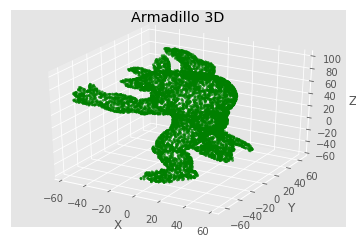

In [4]:
# 1.Before changing any of the code, go ahead and execute assignment1.py. 
# You should see the 3D armadillo. Your goal is to reduce its dimensionality from three to two using PCA 
# to cast a shadow of the data onto its two most important principal components. 
# Then render the resulting 2D scatter plot.

# Render the Original Armadillo
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Armadillo 3D')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.scatter(armadillo.x, armadillo.y, armadillo.z, c='green', marker='.', alpha=0.75)

plt.show()

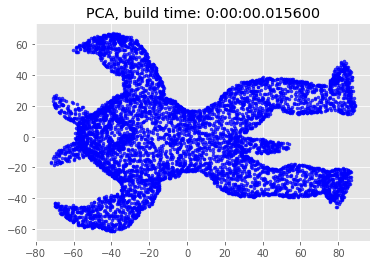

In [13]:
# 2.Fill out the proper code in the do_PCA() and do_RandomizedPCA() methods. 
# Be sure to return the result of your transformation! 
# You may even want to read the SciKit-Learn documentation on .transform(), 
# just for future reference so you know what data type comes out of it.

def do_PCA(armadillo):
    '''
    # TODO: Write code to import the libraries required for PCA.
    # Then, train your PCA on the armadillo dataframe. Finally,
    # drop one dimension (reduce it down to 2D) and project the
    # armadillo down to the 2D principal component feature space.
    #
    # NOTE: Be sure to RETURN your projected armadillo! 
    # (This projection is actually stored in a NumPy NDArray and
    # not a Pandas dataframe, which is something Pandas does for
    # you automatically. =)
    #
    # .. your code here ..
    '''

    pca = PCA(n_components=2)
    pca.fit(armadillo)
    pca.transform(armadillo) 
    
    return pca.transform(armadillo) 

t1 = datetime.datetime.now()
pca = do_PCA(armadillo)
time_delta = datetime.datetime.now() - t1
if not pca is None:
  fig = plt.figure()
  ax = fig.add_subplot(111)
  ax.set_title('PCA, build time: ' + str(time_delta))
  ax.scatter(pca[:,0], pca[:,1], c='blue', marker='.', alpha=0.75)
  plt.show()

C:\Users\ng35019\Software\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


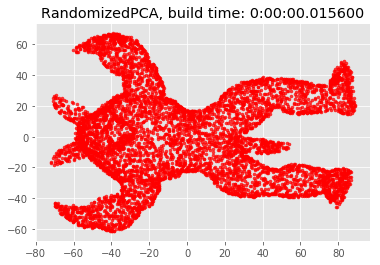

In [14]:
def do_RandomizedPCA(armadillo):
    '''
    # TODO: Write code to import the libraries required for
    # RandomizedPCA. Then, train your RandomizedPCA on the armadillo
    # dataframe. Finally, drop one dimension (reduce it down to 2D)
    # and project the armadillo down to the 2D principal component
    # feature space.
    #
    # NOTE: Be sure to RETURN your projected armadillo! 
    # (This projection is actually stored in a NumPy NDArray and
    # not a Pandas dataframe, which is something Pandas does for
    # you automatically. =)
    #
    # .. your code here ..
    '''
    #pca = PCA(n_components=2, svd_solver='randomized')
    pca = RandomizedPCA(n_components=2)
    pca.fit(armadillo)
    pca.transform(armadillo) 

    return pca.transform(armadillo) 

# Render the newly transformed RandomizedPCA armadillo!
t1 = datetime.datetime.now()
rpca = do_RandomizedPCA(armadillo)
time_delta = datetime.datetime.now() - t1
if not rpca is None:
  fig = plt.figure()
  ax = fig.add_subplot(111)
  ax.set_title('RandomizedPCA, build time: ' + str(time_delta))
  ax.scatter(rpca[:,0], rpca[:,1], c='red', marker='.', alpha=0.75)
  plt.show()